In [10]:
import numpy as np
import pickle
import lzma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:

std_delay_lst = []
for stdDelay_noround in np.arange(0.2, 1.01, 0.2):
    stdDelay = np.round(stdDelay_noround,2)
    std_delay_lst.append(stdDelay)

    
# stdindex = 5
# networktype = "ScaleFree"
# section = 1

# with lzma.open("./VP_agg_section/VPofEvery"+"Networktype_"+str(networktype)+"Sec"+str(section)+".xz", "rb") as fp:
#     result = pickle.load(fp)
#     sns.histplot(result[result['stddelay'] == std_delay_lst[stdindex]]['avgVP'], kde=True)



In [9]:
# section =0
# file_path =  "./VP_agg_section/VPofEveryNetworktype_ScaleFreeSec"+str(section)+".xz"
# with lzma.open(file_path, "rb") as fp:
#     result = pickle.load(fp)

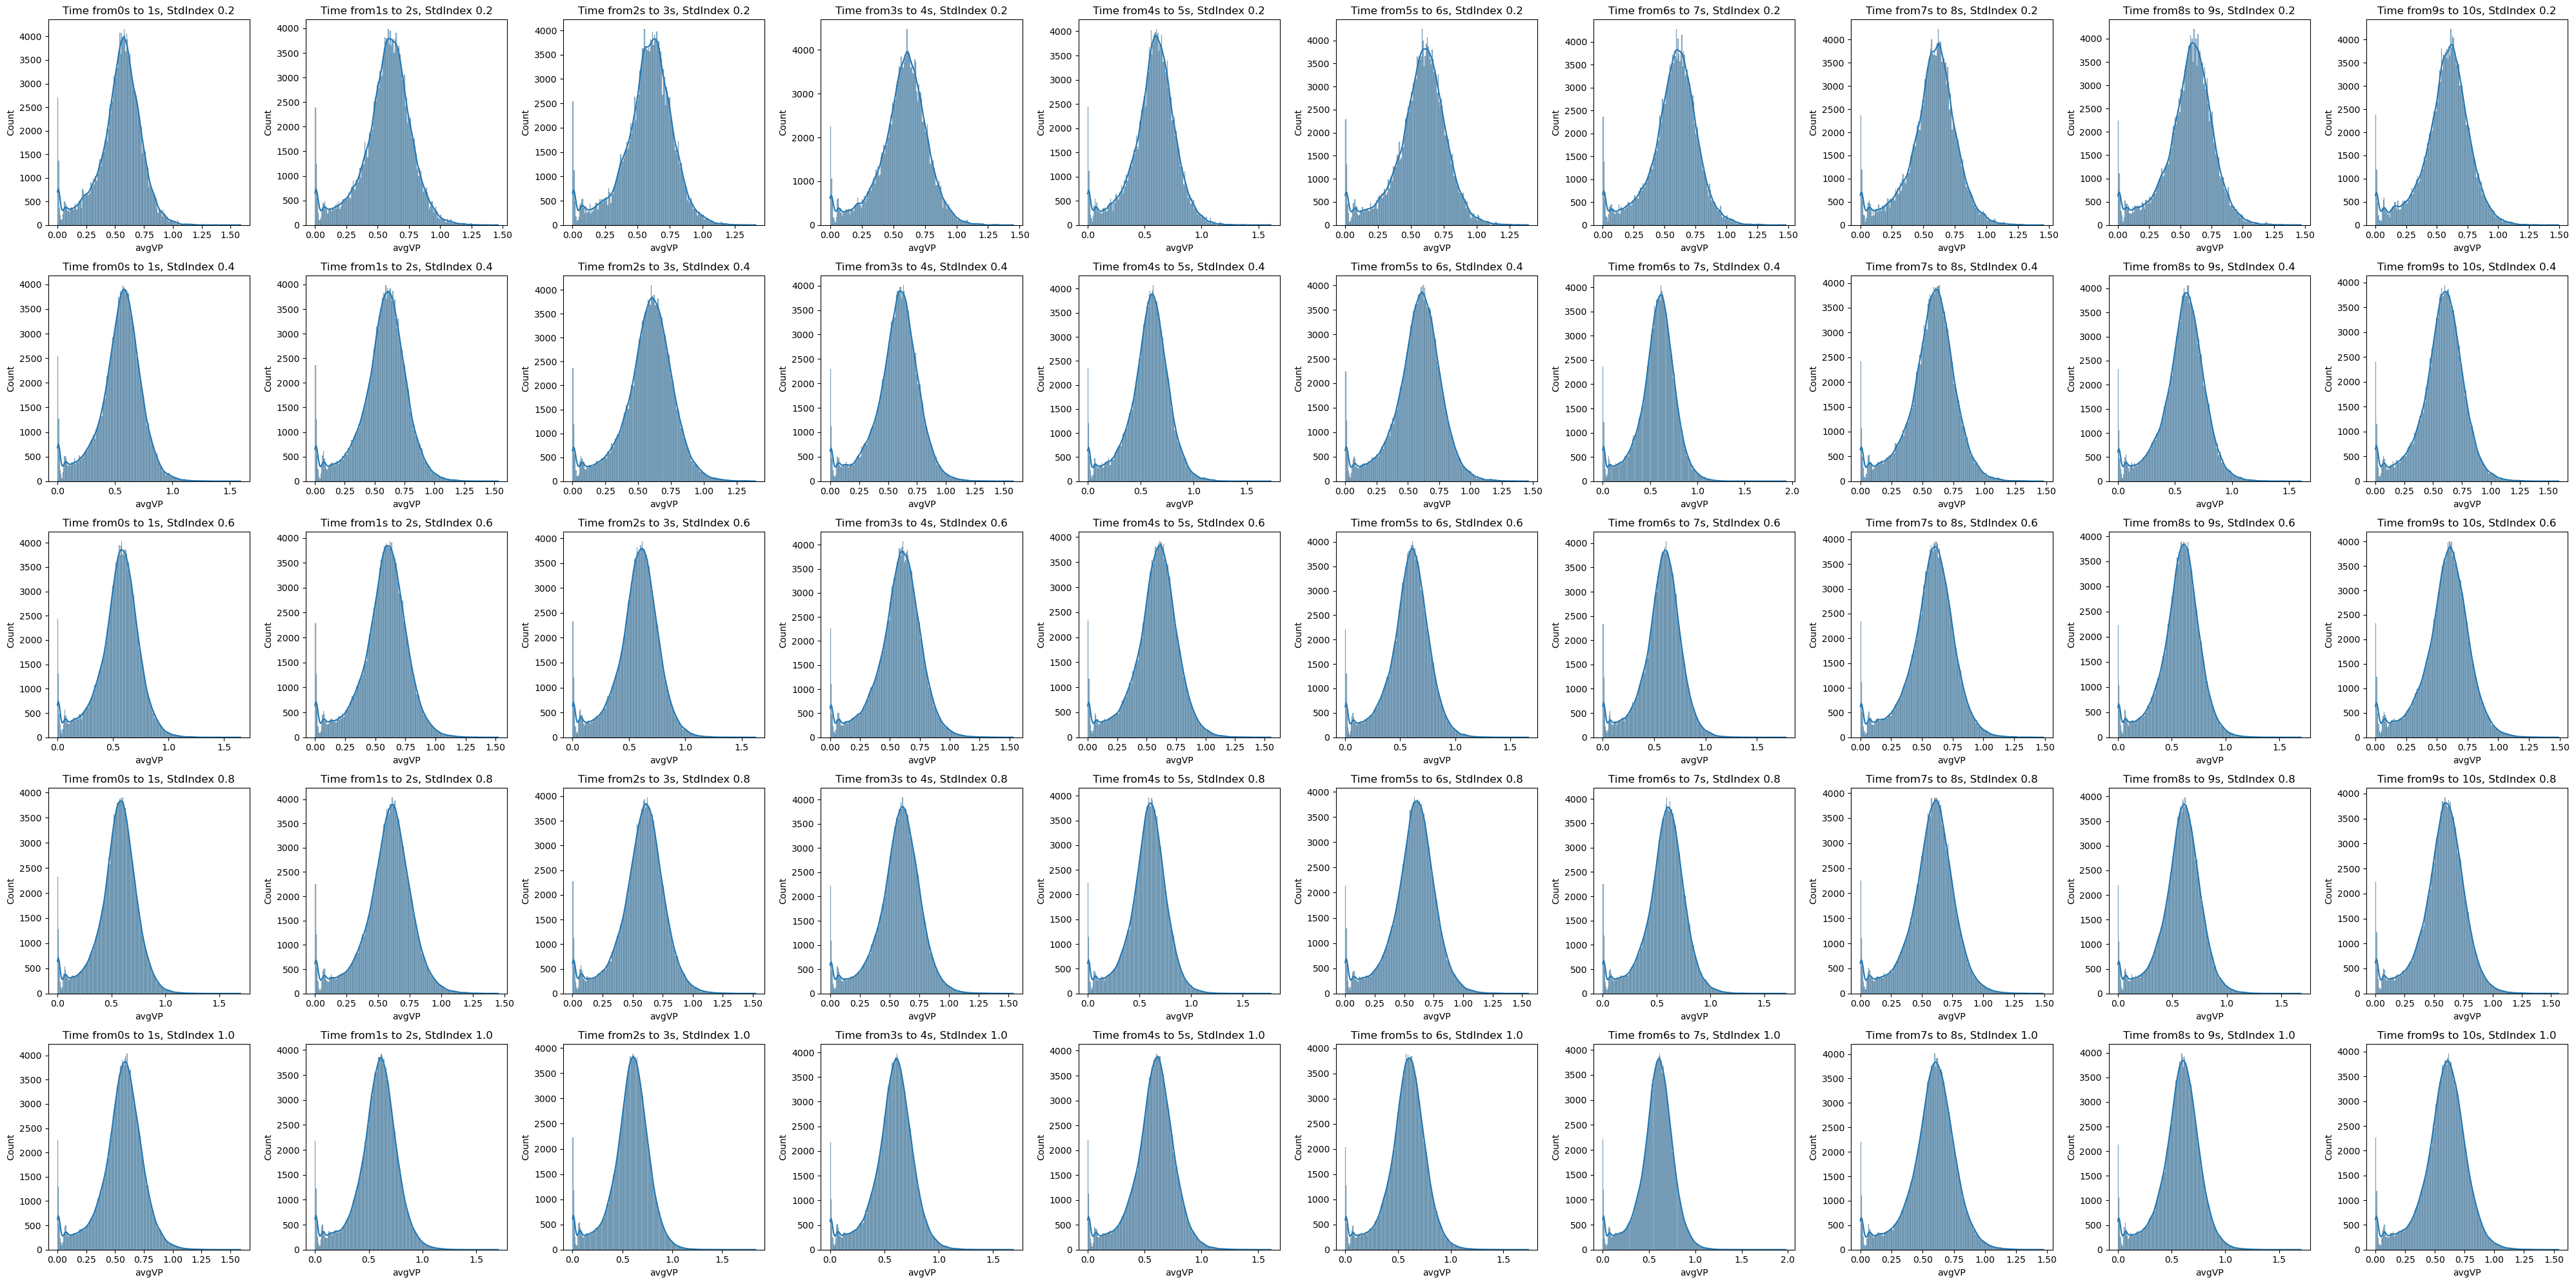

In [15]:
# Define the network type
networktype = "ScaleFree"

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(std_delay_lst), ncols = 10, figsize=(40, 20))  # Adjust figsize as needed
fig.tight_layout(pad=5.0)  # Add space between plots

# Iterate over each row and column to create subplots

for section in range(0, 10):  # section from 1 to 9
    for stdindex in range(len(std_delay_lst)):  # stdindex from 1 to 20
        ax = axes[stdindex, section]
        file_path =  "./VP_agg_section/VPofEveryNetworktype_ScaleFreeSec"+str(section)+".xz"
        with lzma.open(file_path, "rb") as fp:
            result = pickle.load(fp)
    
        ax = axes[stdindex, section]
        sns.histplot(result[result['stddelay'] == std_delay_lst[stdindex]]['avgVP'], kde=True, ax=ax)
        ax.set_title(f'Time from{section}s to {section + 1}s, StdIndex {std_delay_lst[stdindex]}')

plt.tight_layout()

# Show the plot
# plt.show()
plt.savefig('sfsec.png')


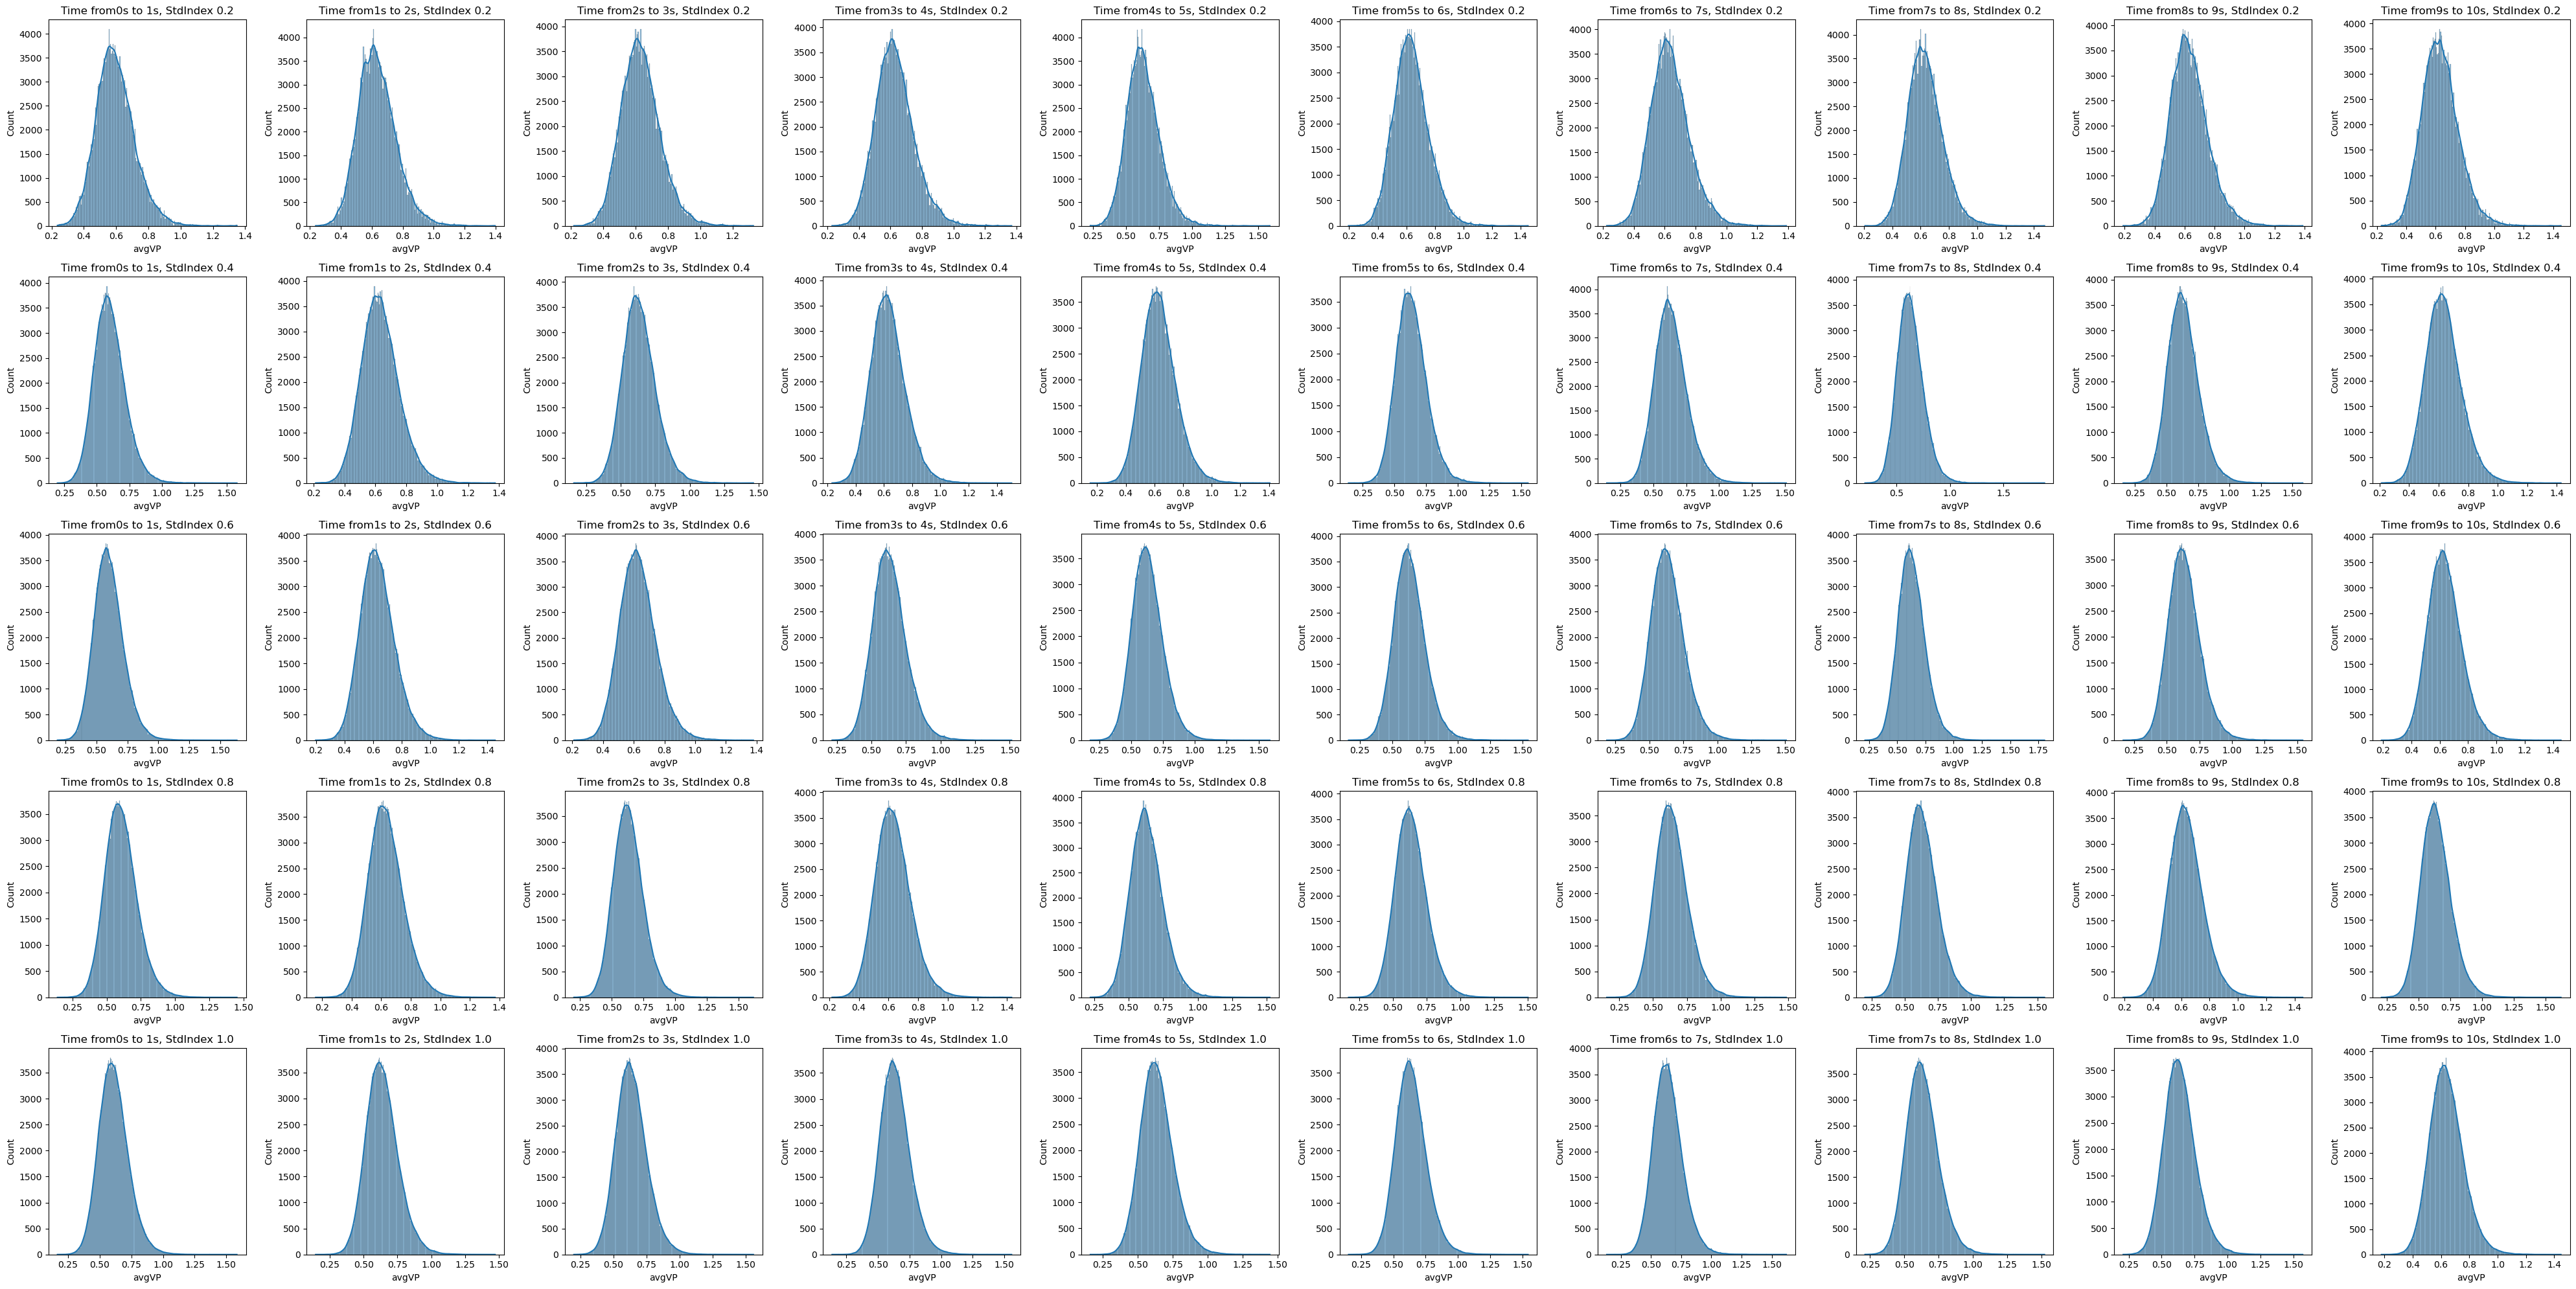

In [14]:
# Define the network type
networktype = "SmallWorld"

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(std_delay_lst), ncols=10, figsize=(40, 20))  # Adjust figsize as needed
fig.tight_layout(pad=5.0)  # Add space between plots

# Iterate over each row and column to create subplots

for section in range(10):  # section from 1 to 9
    for stdindex in range(len(std_delay_lst)):  # stdindex from 1 to 20
        ax = axes[stdindex, section]
        file_path = "./VP_agg_section/VPofEveryNetworktype_SmallWorldSec"+str(section)+".xz"# f"./VP_agg_section/VPofEveryNetworktype_{networktype}Sec{section}.xz"
        with lzma.open(file_path, "rb") as fp:
            result = pickle.load(fp)
    
        ax = axes[stdindex, section]
        sns.histplot(result[result['stddelay'] == std_delay_lst[stdindex]]['avgVP'], kde=True, ax=ax)
        ax.set_title(f'Time from{section}s to {section + 1}s, StdIndex {std_delay_lst[stdindex]}')

plt.tight_layout()

# Show the plot
# plt.show()
plt.savefig('swsec.png')


In [ ]:
# # Define the network type
# networktype = "SmallWorld"

# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=21, ncols=10, figsize=(40, 80))  # Adjust figsize as needed
# fig.tight_layout(pad=5.0)  # Add space between plots

# # Iterate over each row and column to create subplots
# for section in range(0, 10):  # section from 1 to 9
#     for stdindex in range(1, 21):  # stdindex from 1 to 20
#         ax = axes[stdindex, section]
#         file_path = f"./VP_agg_section/VPofEveryNetworktype_{networktype}Sec{section}.xz"
#         with lzma.open(file_path, "rb") as fp:
#             result = pickle.load(fp)
    
#         ax = axes[stdindex, section]
#         sns.histplot(result[result['stddelay'] == std_delay_lst[stdindex]]['avgVP'], kde=True, ax=ax)
#         ax.set_title(f'Time from{section}s to {section + 1}s, StdIndex {std_delay_lst[stdindex]}')

# plt.tight_layout()

# # Show the plot
# plt.show()


In [ ]:
stdindex = 5
networktype = "ScaleFree"
section = 1

with lzma.open("./VP_agg_section/VPofEvery"+"Networktype_"+str(networktype)+"Sec"+str(section)+".xz", "rb") as fp:
    result = pickle.load(fp)
result[result['stddelay'] == std_delay_lst[stdindex]]['avgVP'].mean()


In [5]:
networktype_lst = []
section_lst = []
std_lst = []
meanval_lst = []
for networktype in [ "ScaleFree", "SmallWorld"]:
    for section in range(1, 10):
        file_path = f"./VP_agg_section/VPofEveryNetworktype_{networktype}Sec{section}.xz"
        with lzma.open(file_path, "rb") as fp:
            result = pickle.load(fp)
        for stdindex in range(len(std_delay_lst)):
            meanval = result[result['stddelay'] == std_delay_lst[stdindex]]['avgVP'].mean()
            networktype_lst.append(networktype)
            section_lst.append(section)
            std_lst.append(std_delay_lst[stdindex])
            meanval_lst.append(meanval)
df = pd.DataFrame({
    'networktype': networktype_lst,
    'section': section_lst,
    'std': std_lst,
    'meanval': meanval_lst
})

df

FileNotFoundError: [Errno 2] No such file or directory: './VP_agg_section/VPofEveryNetworktype_ScaleFreeSec1.xz'

In [ ]:
df

In [ ]:
fig, axs = plt.subplots(2, 10, figsize=(80, 20))
counter_i = -1
for networktype in ['ScaleFree', 'SmallWorld']:
    counter_i += 1 
    counter_j = -1
    for section in range(1, 10):
        counter_j += 1
        y = df.loc[(df['networktype'] == networktype) & (df['section'] == section), :].sort_values(by ='std')['meanval']
        axs[counter_i, counter_j].plot(std_delay_lst[1:], y,  label=str(section) + ' section')
        axs[counter_i, counter_j].set_title('60 cells, {} Network, section {}s - {}s'.format(networktype, section, section +1))
        axs[counter_i, counter_j-1].set_ylim([0, 0.2])
        axs[counter_i, counter_j].legend()